In [2]:
import pandas as pd
import numpy as np
from random import randrange
from datetime import timedelta
from datetime import datetime
import random
import string
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

TOTAL_TEST_COUNT = 10**4
POSITIVE_CASE_FREQ = 0.21
NUM_PATIENTS = 40


START_DATE = datetime.strptime('10/1/2020', '%m/%d/%Y')
END_DATE = datetime.strptime('4/21/2021', '%m/%d/%Y')


def random_date(start, end):
    delta = end - start
    int_delta = (delta.days * 24 * 60 * 60) + delta.seconds
    random_second = randrange(int_delta)
    d = start + timedelta(seconds=random_second)
    return f"{d.month}/{d.day}/{d.year}"


d = random_date(START_DATE, END_DATE)

sample_results = random.choices(['positive', 'negative'],
                                weights=[POSITIVE_CASE_FREQ, 1 - POSITIVE_CASE_FREQ],
                                k=TOTAL_TEST_COUNT)

sample_type = ['AN'] * TOTAL_TEST_COUNT
test_type = ['RT-PCR'] * TOTAL_TEST_COUNT

test_dates = [random_date(START_DATE, END_DATE) for _ in range(TOTAL_TEST_COUNT)]
collection_site = random.choices(['Kilachand', 'Health Annex', '808 Gallery', 'Agganis Arena Lobby',
                                  'BU Medical Campus'],
                                 k=TOTAL_TEST_COUNT, weights=[10, 2, 20, 50, 12])

users = [''.join(random.choices(string.digits, k=12)) for _ in range(TOTAL_TEST_COUNT)]

user_id_col = random.choices(users, k=TOTAL_TEST_COUNT)

ct_values = []

df = pd.DataFrame([user_id_col, test_dates, sample_results, test_type, sample_type, collection_site,  ct_values]).T
df.columns = ['user_id', 'test_date', 'sample_result', 'test_type', 'sample_type', 'collection_site',  'ct_values']
df.to_csv('samples_1.csv')

In [3]:
df

,user_id,test_date,sample_result,test_type,sample_type,collection_site,ct_values
0,290362863410,11/24/2020,negative,RT-PCR,AN,BU Medical Campus,None
1,454897280044,10/27/2020,negative,RT-PCR,AN,Agganis Arena Lobby,None
2,139742146950,3/4/2021,positive,RT-PCR,AN,Agganis Arena Lobby,None
3,860396085416,3/20/2021,negative,RT-PCR,AN,808 Gallery,None
4,682686552051,11/5/2020,negative,RT-PCR,AN,808 Gallery,None
...,...,...,...,...,...,...,...
9995,134094449216,4/1/2021,negative,RT-PCR,AN,Agganis Arena Lobby,None
9996,709957862388,3/18/2021,negative,RT-PCR,AN,Agganis Arena Lobby,None
9997,363729959703,3/31/2021,negative,RT-PCR,AN,Agganis Arena Lobby,None
9998,292988055224,3/25/2021,positive,RT-PCR,AN,Agganis Arena Lobby,None


In [4]:
month_dict = {
    '1': 'Jan',
    '2': 'Feb',
    '3': 'March',
    '4': 'April',
    '5': 'May',
    '6': 'June',
    '7': 'July',
    '8': 'Aug',
    '9': 'Sept',
    '10': 'Oct',
    '11': 'Nov',
    '12': 'Dec',
}

def label_date(date_str):
    month, _, year = date_str.split('/')
    
    new_date_str = f"{month_dict[month]} {year}"
    return new_date_str



def label_date_for_sort(date_str):
    month, day, year = date_str.split('/')
    
    date_score =  int(day) + (int(month) * 100) + (int(year) * (10000))
    return date_score

## Positive Samples vs Date

In [12]:
dt = df.copy()

dt['sample_result'] = dt['sample_result'].map({'positive':1, 'negative':0})
dt['test_date_pretty'] = dt['test_date'].apply(lambda date_str: label_date(date_str))
dt['test_date_score'] = dt['test_date'].apply(lambda date_str: label_date_for_sort(date_str))
dt = dt[dt['sample_result'].ne(0)].copy()


agg_map = {'sample_result':'count','test_type':'first', 'user_id':'count', 'test_date_score':'first'}
agg_data = dt.groupby('test_date_pretty').agg(agg_map)

agg_data = agg_data.rename({'user_id':'Total Users Tested', 'sample_result': 'Number of Positive Samples'}, axis=1)
agg_data = agg_data.sort_values('test_date_score', ascending=True)

plot_data = agg_data.copy()

plot_data

,Number of Positive Samples,test_type,Total Users Tested,test_date_score
test_date_pretty,,,,
Oct 2020,333,RT-PCR,333,20201028
Nov 2020,317,RT-PCR,317,20201116
Dec 2020,321,RT-PCR,321,20201206
Jan 2021,308,RT-PCR,308,20210123
Feb 2021,289,RT-PCR,289,20210223
March 2021,322,RT-PCR,322,20210304
April 2021,222,RT-PCR,222,20210402


Text(0, 0.5, 'Number of Positive Samples')

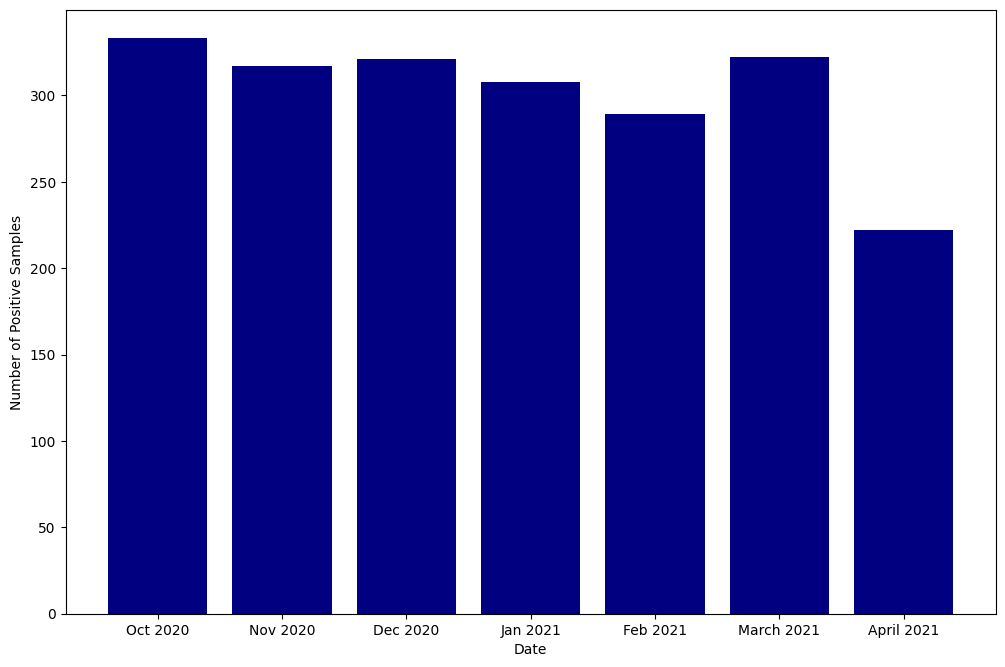

In [18]:
plt.bar(plot_data.index, plot_data['Number of Positive Samples'], color='#000080')
# plt.yticks([])
plt.xlabel('Date')
plt.ylabel('Number of Positive Samples')
# plt.ylim([0,TOTAL_TEST_COUNT//5])



# Positive Samples vs Colleciton Site

In [26]:
dt = df.copy()

dt['sample_result'] = dt['sample_result'].map({'positive':1, 'negative':0})
dt = dt[dt['sample_result'].ne(0)].copy()

agg_map = {'sample_result':'count','test_type':'first', 'user_id':'count'}
agg_data = dt.groupby('collection_site').agg(agg_map)
agg_data = agg_data.rename({'user_id':'Total Users Tested', 'sample_result': 'Number of Positive Samples'}, axis=1)
agg_data = agg_data.sort_values('collection_site', ascending=True)

plot_data = agg_data.copy()

plot_data

,Number of Positive Samples,test_type,Total Users Tested
collection_site,,,
808 Gallery,465,RT-PCR,465
Agganis Arena Lobby,1090,RT-PCR,1090
BU Medical Campus,307,RT-PCR,307
Health Annex,47,RT-PCR,47
Kilachand,203,RT-PCR,203


Text(0, 0.5, 'Number of Positive Samples')

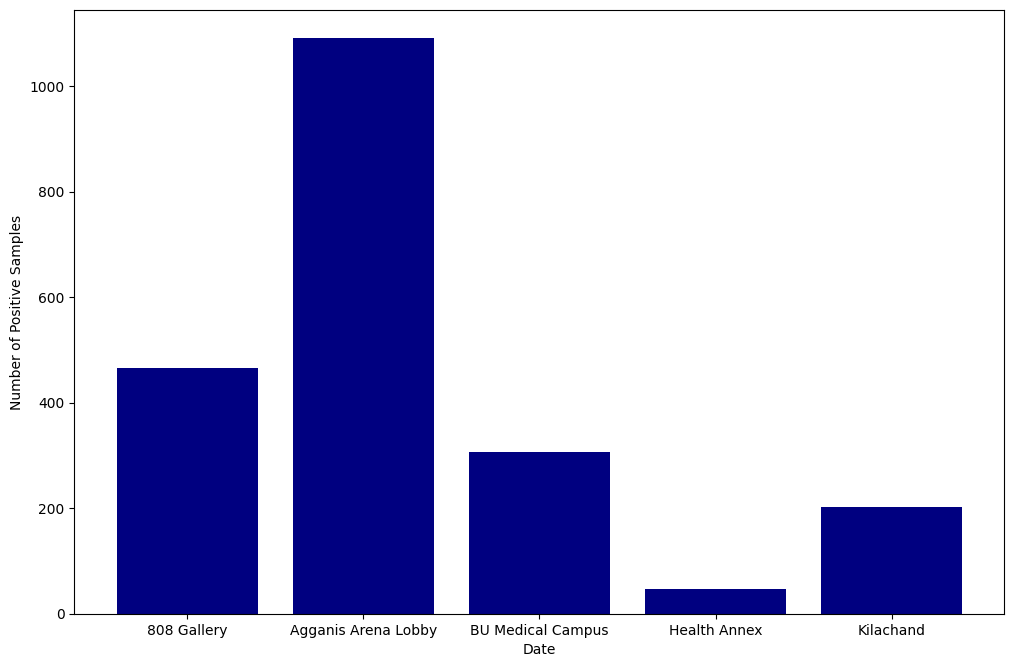

In [27]:
plt.bar(plot_data.index, plot_data['Number of Positive Samples'], color='#000080')
# plt.yticks([])
plt.xlabel('Date')
plt.ylabel('Number of Positive Samples')